## Qué es una variable?

Una variable es una característica, número o cantidad que puede ser medida o contada. Son llamadas 'variables' porque el valor que toman puede variar.  Los siguientes son ejemplos de variables:

- Edad (21, 35, 62, ...)
- Género (masculino, femenino)
- Salario (GBP 20,000, GBP 35,000, GBP 45,000, ...)
- Precio inmueble (GBP 350,000, GBP 570,000, ...)
- País de nacimiento (China, Rusia, Costa Rica, ...)
- Color ojos (negro, verde, azul, ...)
- Marca de Vehículo (Ford, Volkswagen, ...)

La mayoría de las variables pueden ser clasificadas en uno de los siguientes grupos:

- **Variables Numéricas** 
- **Variables Categóricas**

===================================================================================

## Variables Numéricas

Los valores de las variables numéricas son números. Éstas a su vez pueden ser clasificadas: 

- **Variables discretas** 
- **Variables continuas**


### Variables Discretas

En la mayoría de las variables discretas, los valores son números enteros, y los valores que pueden tomar son finitos. Las siguientes son ejemplos de variables discretas:

- Número de cuentas bancarias de una persona (1, 4, 7, ...)
- Número de mascotas en una familia
- Número de hijos en una familia


### Variable Continua

Las variables continuas pueden tomar cualquier valor dentro de un rango específico. Por ejemplo, el total pagado por un cliente en un supermercado es continuo. El cliente  puede pagar GBP 20.5, GBP 13.10, GBP 83.20 y así sucesivamente. Otros ejemplos de variables continuas son:

- Precio del inmueble (en principio, puede tomar cualquier valor) (GBP 350,000, 57,000, 100,000, ...)
- Tiempo navegando una página web (3.4 segundos, 5.10 segundos, ...)
- Deuda total como porcentaje del salario en el último mes (0.2, 0.001, 0, 0.75, ...)

=============================================================================

## En este demo: Préstamos Peer-to-peer  (P2P)

En este demo, usaremos los datos de una compañía financiera especializada en préstamos peer-to-peer **Lending Club**. Usaremos los datos para examinar variables numéricas ya sean discretas o continuas.

- Para descargar los datos, favor referirse a la clase de **Datos** en la **Sección 1** del curso.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Definición de las variables del set de datos:
#-------------------------
# loan_amnt: Valor del préstamo
# int_rate:  tasa de interés
# annual_inc: salario anual 
# open_acc: número de cuentas bancarias abiertas (más detalles más adelante)
# loan_status: estado del préstamo (paid (pagado), defaulted (pago incumplido), etc)
# open_il_12m: cuentas abiertas en los últimos 12 meses

use_cols = [
    'loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status',
    'open_il_12m'
]

# Carguemos los datos con solo unas columnas y unas pocas filas para 
# facilitar y reducir el tiempo que toma correr el demo.

data = pd.read_csv('../loan.csv', usecols=use_cols).sample(
    10000, random_state=60)  # fijamos la semilla o "seed" para poder reproducir resultados

data.head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m
741765,28000.0,6.24,90000.0,Current,9.0,NaN
758737,18125.0,15.61,63000.0,Fully Paid,9.0,NaN
93698,14000.0,21.15,97639.0,Fully Paid,25.0,NaN
25180,8000.0,7.51,52000.0,Fully Paid,10.0,NaN
236422,9725.0,19.24,100000.0,Late (16-30 days),6.0,NaN


### Variables Continuas

In [3]:
# Examinemos los valores de la variable loan_amnt
# este es el valor del préstamo requerido por el prestamista
# en dólares americanos

# esta variable es continua, y puede en principio tomar cualquier valor

data.loan_amnt.unique()

array([28000., 18125., 14000.,  8000.,  9725., 18000., 12000.,  2500.,
       27000.,  5000., 35000.,  7125., 21200., 10200., 16000., 24000.,
       22875.,  6500.,  9900.,  3600., 12600., 17450., 24400.,  7875.,
       13000.,  9600.,  5125.,  9000.,  6000., 32000.,  5400.,  4750.,
       11475.,  1500.,  9650., 12750.,  7750.,  3000.,  2200., 14125.,
        7200.,  5675.,  8500., 14700., 20000., 15000.,  8800., 10000.,
        7500.,  4375.,  7000., 25000.,  3100.,  4800.,  6400.,  5375.,
        4100.,  2300.,  9500., 26650.,  9800., 14400., 24625.,  4000.,
        8575.,  2000., 11800., 14500.,  5500., 17200., 13300., 30000.,
       11000., 19000.,  9450., 16700.,  9300., 12150., 21000.,  8400.,
       12300., 21750., 17000., 12975.,  7725., 10800.,  3500.,  4575.,
       14475., 18900.,  9100., 16425., 10150., 17475., 10775., 11500.,
        3275.,  2800., 22000.,  7075.,  3250., 10500., 12800.,  4600.,
        8300., 16950., 17350., 24725.,  1200., 13700., 15925.,  7600.,
      

Text(0, 0.5, 'Número de préstamos')

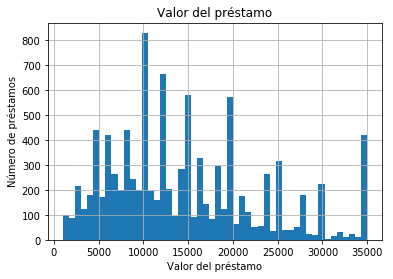

In [4]:
# Examinemenos el histograma para familiarizarnos con la
# distribución de la variable

fig = data.loan_amnt.hist(bins=50)

fig.set_title('Valor del préstamo')
fig.set_xlabel('Valor del préstamo')
fig.set_ylabel('Número de préstamos')

Los valores de la variable pueden ser cualquier monto en el rango en el cual típicamente se encuentran los préstamos. Esta es una característica de las variables continuas.

**Nota**: Las barras más altas corresponden a los préstamos por valores de 10,000, 15,000, 20,000, and 35,000 USD, indicando que hay más préstamos concedidos por esos montos. Tiene sentido, ya que estos montos son los valores predeterminados de préstamos ofrecidos en la página web de Lending Club. Otros valores menos frecuentes, son 23,000 o 33,000 que son probablemente específicamente solicitados por personas que requieren un monto específico para un propósito en particular.


In [5]:
# Hagamos el mismo ejercicio para la variable tasa de interés
# Este es el interés cobrado por 'Lending Club' a los prestamistas

# esta variable también es continua, y puede tomar en principio cualquier valor
# dentro del rango 0%-100%

data.int_rate.unique()

array([ 6.24, 15.61, 21.15,  7.51, 19.24, 12.49,  6.03, 14.99,  9.71,
        7.89,  8.18, 18.24, 13.33, 11.99, 16.55, 10.99, 23.83, 18.92,
        7.43, 13.67, 17.77, 17.27,  7.26, 18.54, 18.25, 21.18, 13.99,
       16.29,  8.39,  8.19, 14.31, 15.31, 12.39, 11.53, 21.67, 14.33,
       23.43, 12.29, 12.69, 17.57, 22.99, 21.98, 24.08, 10.49, 13.53,
       11.22, 12.05, 18.55, 12.59,  5.32, 11.14, 19.52, 14.65,  6.49,
       12.99, 17.86,  9.17, 14.3 , 16.78,  8.67, 14.49, 16.99, 24.99,
        6.68, 18.99,  8.9 ,  6.97, 11.67, 12.12, 10.74, 23.99,  7.62,
       10.65,  9.25, 15.99,  9.99, 13.35, 11.44,  7.91, 13.49, 13.98,
       18.49,  7.12,  7.9 , 12.23, 15.59,  9.67, 15.8 ,  6.89, 13.11,
        9.76, 20.99, 19.22,  7.49, 14.64,  5.42, 17.76,  6.62, 16.2 ,
       21.99, 12.35, 10.64, 14.98, 13.66, 19.99,  7.88,  6.92, 20.49,
       13.18, 11.55, 16.45,  9.8 , 17.56, 21.  ,  9.49,  6.39, 17.97,
       22.4 , 10.15, 13.65, 15.1 , 21.6 , 14.85, 13.23,  7.29, 22.45,
        8.38, 10.16,

Text(0, 0.5, 'Número de préstamos')

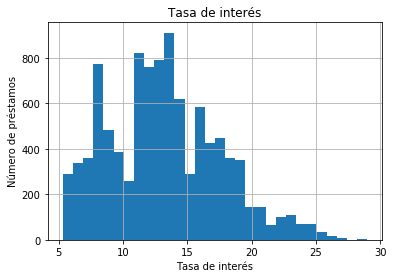

In [6]:
# Creemos un histograma para familiarizarnos con la 
# distribución de la variable

fig = data.int_rate.hist(bins=30)

fig.set_title('Tasa de interés')
fig.set_xlabel('Tasa de interés')
fig.set_ylabel('Número de préstamos')

Podemos ver que los valores de la variable se encuentran en el rango esperado para dicha variable. Los valores corresponden a las tasas de interés cobradas a los prestamistas.

Text(0, 0.5, 'Número de Clientes')

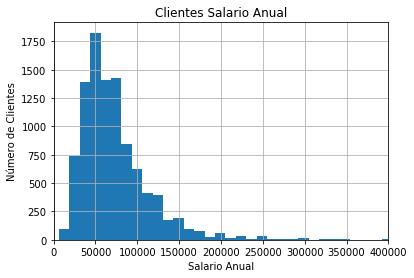

In [7]:
# Ahora, exploremos el salario anual declarado por cada uno de los clientes

# Esta variable es también continua

fig = data.annual_inc.hist(bins=100)

# para visualizarla mejor, restringiremos 
# el rango del eje x
fig.set_xlim(0, 400000)

# Título y leyendas para los ejes.
fig.set_title("Clientes Salario Anual")
fig.set_xlabel('Salario Anual')
fig.set_ylabel('Número de Clientes')

La mayoria de los salarios estan concentrados alrededor del rango de 30-70k, con solo unos pocos clientes ganando salarios mayores. Ya que es una variable continua, los valores varian continuamente en el rango de salarios que se encuentran disponibles.

### Variables Discretas

Exploremos la variable "Número de líneas de crédito abiertas en el expediente de crédito del prestamista" (open_acc en los datos). Esta variable representa el número total de productos en diferentes líneas de crédito  (por ejemplo tarjetas de crédito, préstamos para carros, hipotecas, etc.) que se conocen del prestamista. Por definición, es una variable discreta, porque el prestamista puede tener 1 tarjeta de crédito, pero no 3.5 tarjetas de crédito. Y en principio, un cliente puede tener solo un número finito de cuentas bancarias.

In [8]:
# Examinemos los valores de la variable 

# esta es una variable discreta
data.open_acc.dropna().unique()

array([ 9., 25., 10.,  6., 15.,  5.,  7.,  8., 12., 17., 13., 11.,  3.,
       19., 16., 18., 20., 21., 22.,  4., 23., 24., 26., 14., 29., 44.,
       27., 28., 36., 30.,  2., 35., 42., 32., 38., 37., 33., 46., 34.,
       39., 40., 31., 47.,  1., 55., 49., 41.])

Text(0, 0.5, 'Número de Clientes')

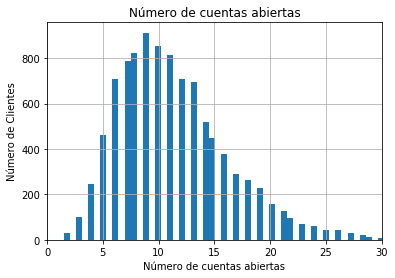

In [9]:
# Creemos un histograma para familiarizarnos con la 
# distribución de la variable

fig = data.open_acc.hist(bins=100)

# para visualizarla mejor, restringiremos 
# el rango del eje x
fig.set_xlim(0, 30)

# Título y leyendas para los ejes.
fig.set_title('Número de cuentas abiertas')
fig.set_xlabel('Número de cuentas abiertas')
fig.set_ylabel('Número de Clientes')

Los histogramas de las variables discretas parecen 'quebrados', ya que no todos los valores dentro del rango posible (de la variable) están presentes. Como ya mencionamos, un cliente puede tener 3 tarjetas de crédito, pero no 3.5 tarjetas de créditos.

Miremos otro ejemplo de una variable discreta en estos datos: **Número de préstamos a plazos o término fijo, tomados en los últimos 12 meses** (open_il_12m en los datos). Préstamos a plazos son los que al momento de adquirirlos, tienen un periodo fijo y un número de pagos acordados previamente entre el prestamista y la institución de crédito.  Un ejemplo son los préstamos para carros, o préstamos para estudiantes. El prestamista sabe que deberá pagar la deuda con un número fijo de cuotas con un valor predeterminado, por ejemplo $2,000 en 36 meses.

In [10]:
# Examinemos los valores de la variable

data.open_il_12m.unique()

array([nan,  0.,  1.,  4.,  2.,  3.])

Text(0, 0.5, 'Número de Prestamistas')

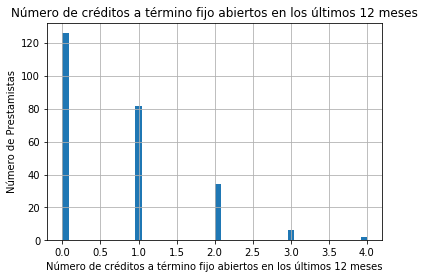

In [11]:
# Creemos un histograma para familiarizarnos con la 
# distribución de la variable

fig = data.open_il_12m.hist(bins=50)
fig.set_title('Número de créditos a término fijo abiertos en los últimos 12 meses')
fig.set_xlabel('Número de créditos a término fijo abiertos en los últimos 12 meses')
fig.set_ylabel('Número de Prestamistas')

La mayoría de los prestamistas no tienen o solo han abierto 1 línea de crédito a termino fijo, con tan solo unos pocos prestamistas con 2 o más.

### Una variación de las variables discretas: variables binarias

Las variables binarias, son variables discretas, que tan solo toman 2 valores, y por lo tanto son binarias.

En las próximas celdas, crearemos una variable adicional que capture el número de préstamos que el prestamista ha incumplido en pagar (en inglés 'defaulted') y por lo tanto se considera que el dinero se ha perdido.

La variable toma valores de 0 cuando el préstamo está bien, es decir, que los pagos se han hecho regularmente o 1, cuando el prestamista ha confirmado que no podrá pagar más cuotas del préstamo.


In [12]:
# Examinemos los valores de la variable loan_status

data.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (16-30 days)', 'In Grace Period',
       'Charged Off', 'Late (31-120 days)', 'Issued', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [13]:
# Creemos una variable adicional llamada "defaulted".
# Esta variable indica si el prestamista ha incumplido con sus pagos y que el dinero
# se considera perdido - préstamo no reembolsado

data['defaulted'] = np.where(data.loan_status.isin(['Default']), 1, 0)
data.defaulted.mean()

0.0014

In [14]:
# La nueva variable toma el valor 1 si el prestamista a incumplido

data.head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m,defaulted
741765,28000.0,6.24,90000.0,Current,9.0,NaN,0
758737,18125.0,15.61,63000.0,Fully Paid,9.0,NaN,0
93698,14000.0,21.15,97639.0,Fully Paid,25.0,NaN,0
25180,8000.0,7.51,52000.0,Fully Paid,10.0,NaN,0
236422,9725.0,19.24,100000.0,Late (16-30 days),6.0,NaN,0


Comparemos las columnas de 'loan_status' y 'defaulted' para confirmar el resultado de la función anterior.

In [15]:
# La nueva variable toma el valor 1 si el prestamista a incumplido

data[data.loan_status.isin(['Default'])].head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m,defaulted
384190,15000.0,16.99,148000.0,Default,29.0,NaN,1
390929,5900.0,13.98,35000.0,Default,5.0,NaN,1
833604,9300.0,21.67,55000.0,Default,8.0,NaN,1
884540,21675.0,18.54,69000.0,Default,6.0,NaN,1
829445,11225.0,18.25,49000.0,Default,13.0,NaN,1


In [16]:
# Una variable binaria, puede tomar 2 valores. Por ejemplo, 
# la variable "defaulted" que acabamos de crear
# toma el valor de uno si los pagos se incumplieron - préstamo no reembolsado (defaulted) (1) 
# o (0) si no es el caso.

data.defaulted.unique()

array([0, 1], dtype=int64)

Text(0, 0.5, 'Número de préstamos')

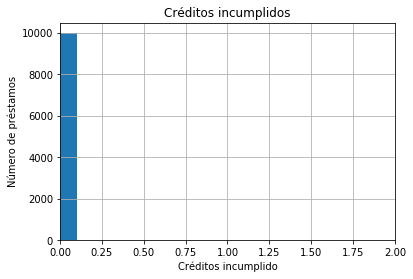

In [17]:
# Creemos un histograma, aunque para una variable binaria no es la mejor opción.

fig = data.defaulted.hist()
fig.set_xlim(0, 2)
fig.set_title('Créditos incumplidos')
fig.set_xlabel('Créditos incumplido')
fig.set_ylabel('Número de préstamos')

Podemos ver, que la variable toma 2 valores, 0 y 1, y que la mayoría de los préstamos estan bien (al día con los pagos).


**Esto es todo por este demo, esperamos lo hayan disfrutado y nos vemos en el siguiente.**